In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [21]:
data = pd.read_csv("../data/titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [22]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [7]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [8]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [9]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [10]:
age_categories = [age_category(age) for age in data.Age]

In [11]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [96]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 577 мужчин и 314 женщин

In [101]:
data['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 108

108


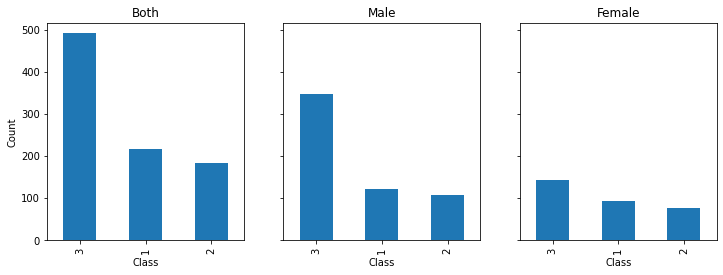

In [214]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.set_facecolor('white')
axs[0].set_title('Both')
axs[1].set_title('Male')
axs[2].set_title('Female')
for ax in axs:
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
data['Pclass'].value_counts().plot(kind='bar', ax=axs[0])
data[data['Sex'] == 'male']['Pclass'].value_counts().plot(kind='bar', ax=axs[1])
data[data['Sex'] == 'female']['Pclass'].value_counts().plot(kind='bar', ax=axs[2])

print(data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0])

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69

In [220]:
print('Median', round(data['Fare'].median(), ndigits=2))
print('Std', round(data['Fare'].std(), ndigits=2)).values_count()

Median 14.45
Std 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 40.6% среди молодых и 22.7% среди старых


In [237]:
print('Young', round(data[(data['Age'] < 30)]['Survived'].value_counts(normalize=True)[1] * 100, ndigits=1))
print('Old', round(data[(data['Age'] > 60)]['Survived'].value_counts(normalize=True)[1] * 100, ndigits=1))

Young 40.6
Old 22.7


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 18.9% среди мужчин и 74.2% среди женщин

In [240]:
print('Male', round(data[(data['Sex'] == 'male')]['Survived'].value_counts(normalize=True)[1] * 100, ndigits=1))
print('Female', round(data[(data['Sex'] == 'female')]['Survived'].value_counts(normalize=True)[1] * 100, ndigits=1))

Male 18.9
Female 74.2


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- William

In [293]:
names = data[data['Sex'] == 'male']['Name'].str.split(expand=True)
names[2].value_counts().head(1)

William    35
Name: 2, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


<AxesSubplot:title={'center':'Dead'}, xlabel='Age', ylabel='Count'>

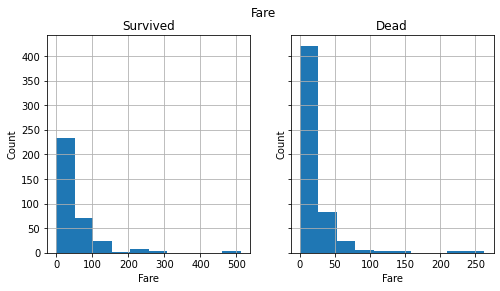

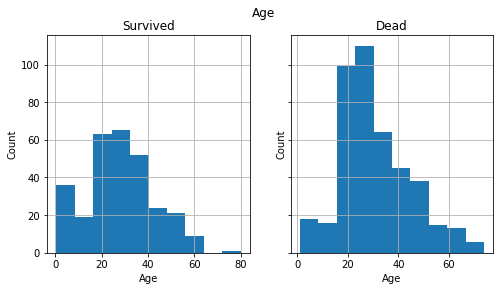

In [347]:
print(data.groupby('Survived')['Age'].mean())
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.set_facecolor('white')
plt.suptitle('Fare')
axs[0].set_title('Survived')
axs[1].set_title('Dead')
for ax in axs:
    ax.set_ylabel('Count')
    ax.set_xlabel('Fare')
data[data['Survived'] == 1]['Fare'].hist(ax=axs[0])
data[data['Survived'] == 0]['Fare'].hist(ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.set_facecolor('white')
plt.suptitle('Age')
axs[0].set_title('Survived')
axs[1].set_title('Dead')
for ax in axs:
    ax.set_ylabel('Count')
    ax.set_xlabel('Age')
data[data['Survived'] == 1]['Age'].hist(ax=axs[0])
data[data['Survived'] == 0]['Age'].hist(ax=axs[1])

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [345]:
print('Male', data[(data['Sex'] == 'male')].groupby('Pclass')['Age'].mean())
print('\nFemale', data[(data['Sex'] == 'female')].groupby('Pclass')['Age'].mean())

Male Pclass
1    41.281386
2    30.740707
3    26.507589
Name: Age, dtype: float64

Female Pclass
1    34.611765
2    28.722973
3    21.750000
Name: Age, dtype: float64
